In [1]:
print("FIFA 23 Visualization and Prediction ")

FIFA 23 Visualization and Prediction 


<h1>FIFA 23 ML Project</h1> <img src="https://img.icons8.com/color/48/null/football-team.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Importing Our FIFA 23 Dataset
fifa23 = pd.read_csv('players_fifa23.csv')
fifa23.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [4]:
fifa23.shape

(18539, 90)

In [5]:
needed_columns = ['ID', 'Name', 'Age', 'Height', 'Weight',
       'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ContractUntil', 'ClubJoined', 'OnLoad',
       'PreferredFoot', 'IntReputation', 'WeakFoot','Nationality',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


fifa23 = fifa23[needed_columns]

## Exploratory Data Analysis On Our Data

### 1. Does the Age of the Player Affect on his Ball Control Performance?

<Figure size 576x432 with 0 Axes>

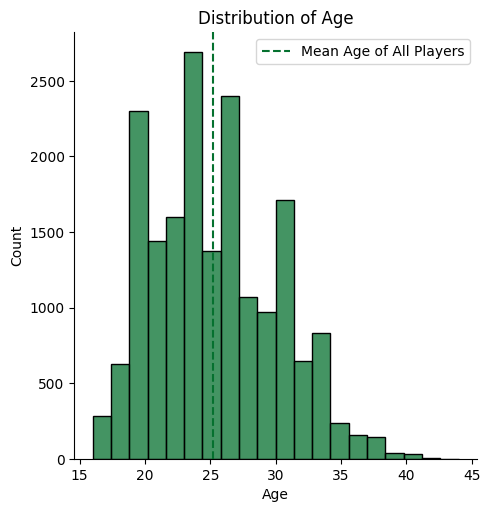

In [6]:
sns.set_palette("Greens_r")
plt.figure(dpi=90)
sns.displot(x=fifa23['Age'], kde=False, bins=20)
plt.axvline(x=np.mean(fifa23['Age']), ls='--', label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

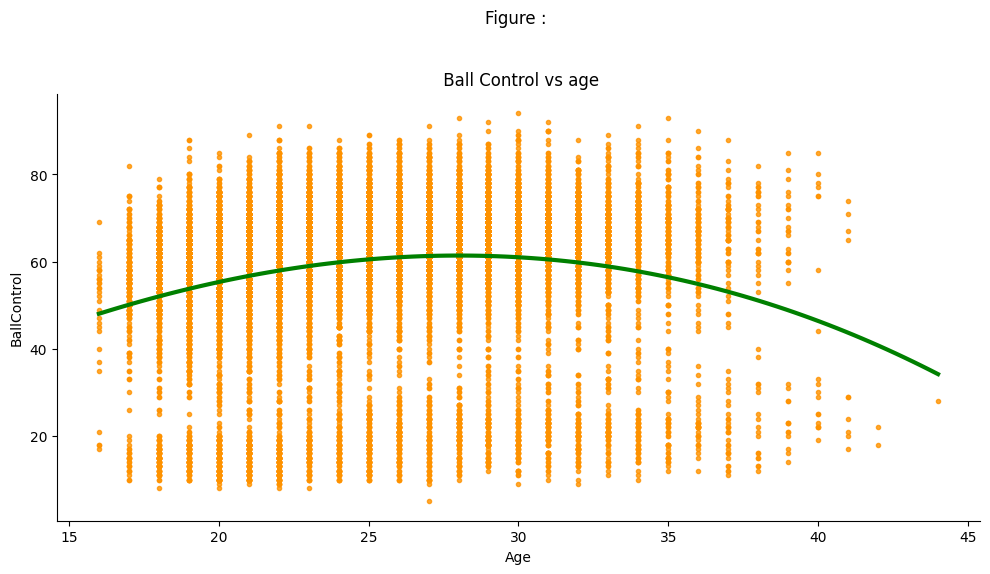

In [7]:
sns.set_palette("Wistia_r")
sns.lmplot(x="Age", y="BallControl",data=fifa23,markers=".",
           order=3, ci=None, line_kws={"linewidth":3,"color":"green"},aspect=2);

plt.title("Figure : \n\n\n Ball Control vs age");
plt.show()

#### So We can deduce that the age has an effect on the Player's Ball Control.

#### While the Age is increasing, the Ball Control decreases

### 2. Show how Height affects different factors like stamina, dribbling, pace, passing and HeadingAccuracy:


<Axes: xlabel='Height', ylabel='Value'>

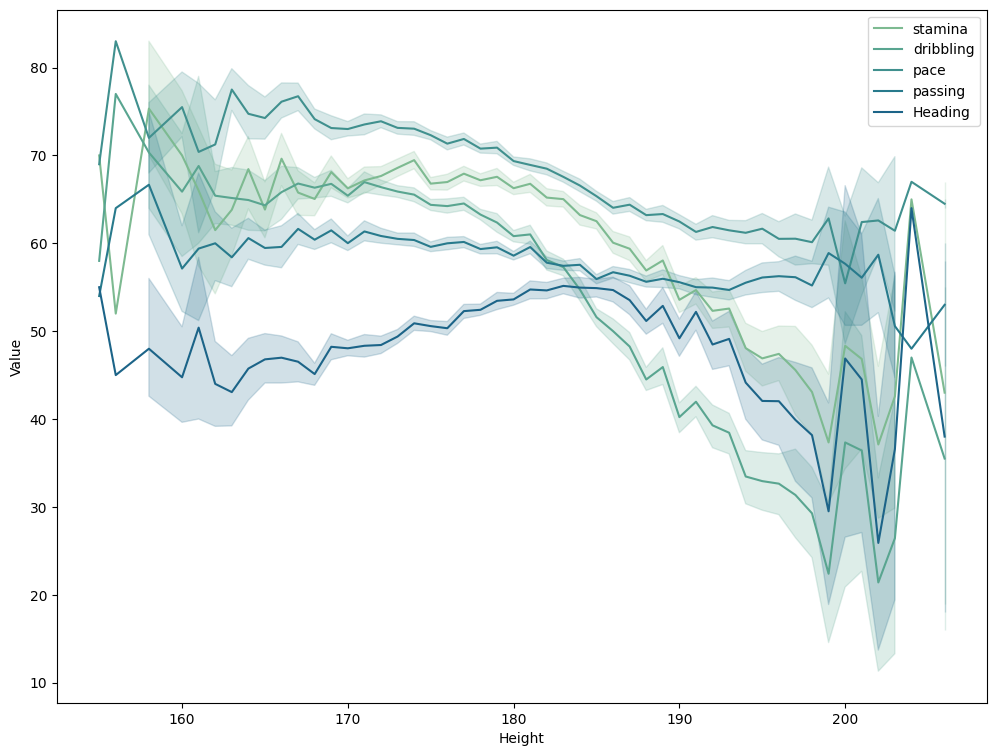

In [8]:
sns.set_palette("crest")
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.ylabel("Value")

sns.lineplot(x='Height', y='Stamina', data=fifa23, legend='brief', label='stamina')
sns.lineplot(x='Height', y='Dribbling', data=fifa23, legend='brief', label='dribbling')
sns.lineplot(x='Height', y='PaceTotal', data=fifa23, legend='brief', label='pace')
sns.lineplot(x='Height', y='PassingTotal', data=fifa23, legend='brief', label='passing')
sns.lineplot(x='Height', y='HeadingAccuracy', data=fifa23, legend='brief', label='Heading')


##### As height increases, features like stamina, dribbling, pace, passing decreases.

##### As height increases, features like Heading increase.

### 3. Show if there is a realtion between Wage and Overall of the Players:

/var/folders/25/rf4mbdbs69j35tjr9l6npkl80000gn/T/ipykernel_10833/3506941858.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='WageEUR',y='Overall',palette = 'hue', aspect=2.5,data=fifa23)


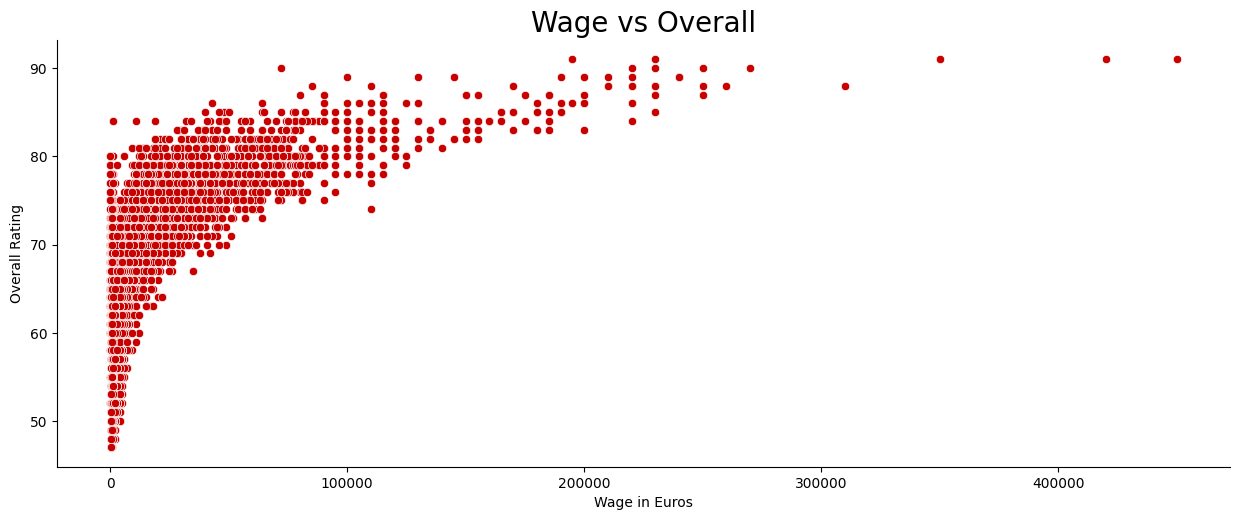

In [9]:
sns.set_palette("seismic_r")
sns.relplot(x='WageEUR',y='Overall',palette = 'hue', aspect=2.5,data=fifa23)
plt.title('Wage vs Overall',fontsize = 20)
plt.xlabel('Wage in Euros')
plt.ylabel('Overall Rating')
plt.show()

##### As the Overall Rating Increase, the Wage of the Player Increases too.

### 4. Show the top Quikest Players:

<Axes: xlabel='Name', ylabel='Acceleration'>

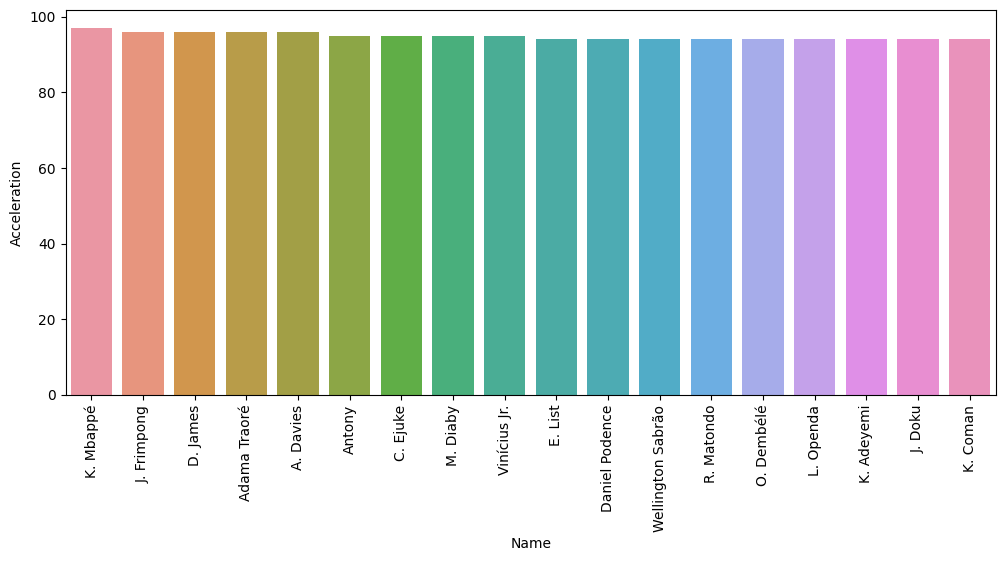

In [10]:
# Sorting the Players Speed In Descending Order
top_acc = fifa23.sort_values(by=["Acceleration"], ascending=False)

plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Acceleration", data=top_acc.head(20))

### 5. Determine if their is a relation between the Position of the Player and his Wage and Value:

<Axes: xlabel='BestPosition', ylabel='WageEUR'>

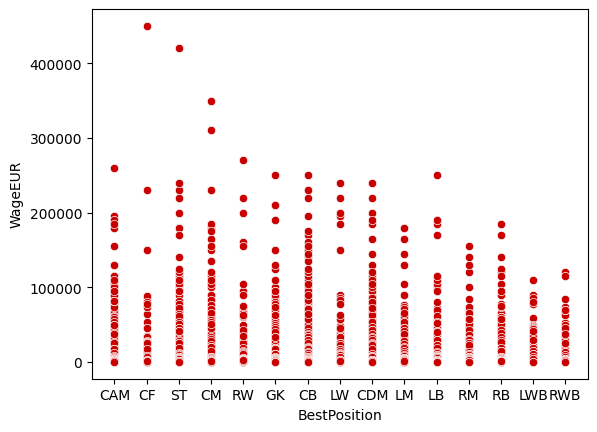

In [11]:
sns.scatterplot(x="BestPosition", y="WageEUR", data=fifa23)

<Axes: xlabel='BestPosition', ylabel='ValueEUR'>

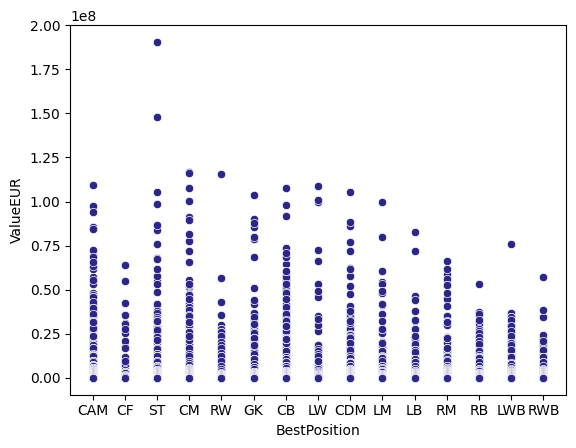

In [12]:
sns.set_palette("CMRmap")
sns.scatterplot(x="BestPosition", y="ValueEUR", data=fifa23)

 ##### So we can see that the Players in Positions LM, RM, RB, LWB, RWB got the lowest Wages.

##### And the Players With Positions LB, RB, LWB, RWB have the lowest Values.

### 6. See the Nationality of the Players that got the highest Wages:

In [13]:
top_wages = fifa23.sort_values(by=["WageEUR"], ascending=False)

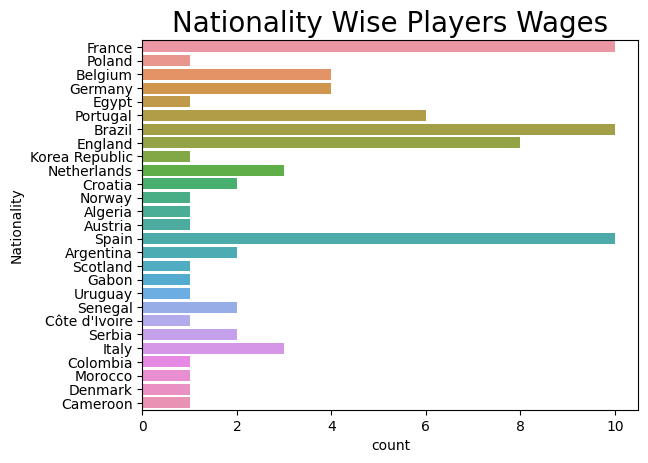

In [14]:
sns.countplot(y="Nationality",data=top_wages.head(80))
plt.title("Nationality Wise Players Wages",
          fontsize=20);

##### So we can deduce that the Players that got the Maximum Wage are from Brazil, France and Spain

### 7. Show the effect of the Age on the Potential of the Players:

<Axes: xlabel='Age', ylabel='Potential'>

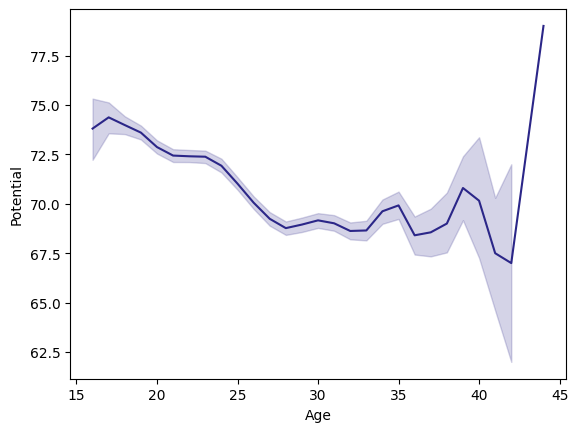

In [15]:
sns.lineplot(x="Age", y="Potential", data=fifa23)

#### While the Age Increases the Potential of the Player Decreases.

### 8. View the Top 50 Players and their Clubs:

<Axes: xlabel='Name', ylabel='Overall'>

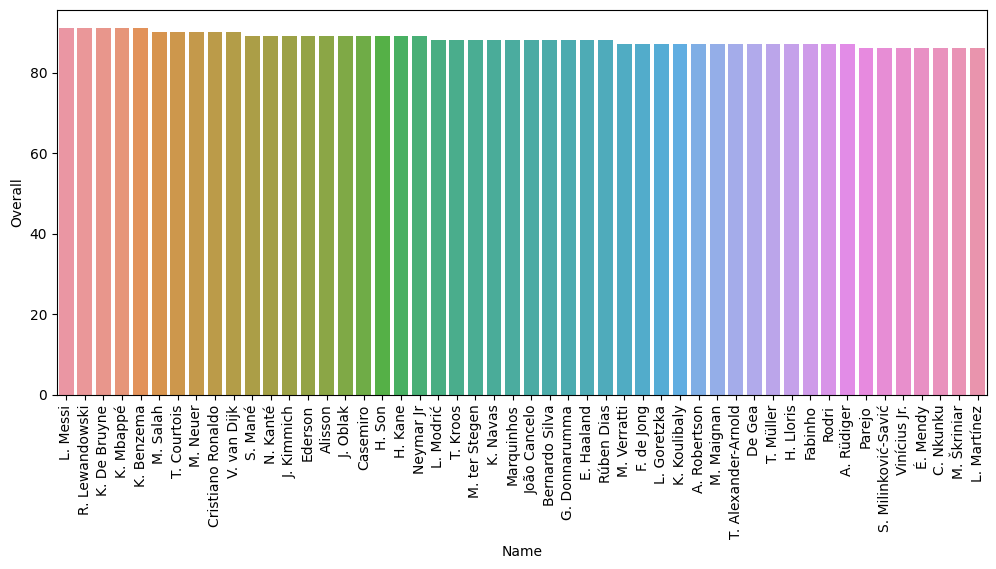

In [16]:
top_rated = fifa23.sort_values(by=["Overall"], ascending=False)
top50 = top_rated.head(50)

plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.barplot(x="Name", y = "Overall", data=top50)

<Axes: xlabel='Club', ylabel='count'>

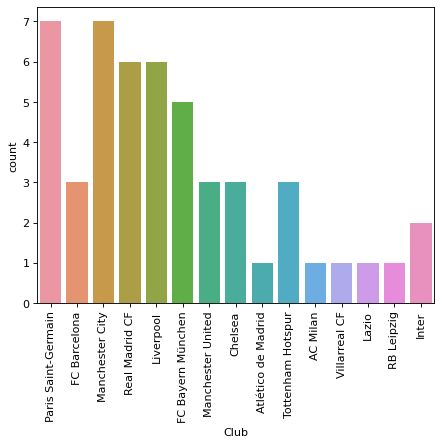

In [17]:
plt.figure(dpi=80)
plt.xticks(rotation=90)
sns.countplot(x="Club", data=top50)

##### - Paris Saint-Germainand Machester City have the maximum top Players numbers.

##### - Liverpool and Real Madrid have the second Maximum top Players numbers.

### Young Players

In [18]:
fifaa23 = pd.read_csv('players_fifa23.csv')

In [19]:
fifaa23.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


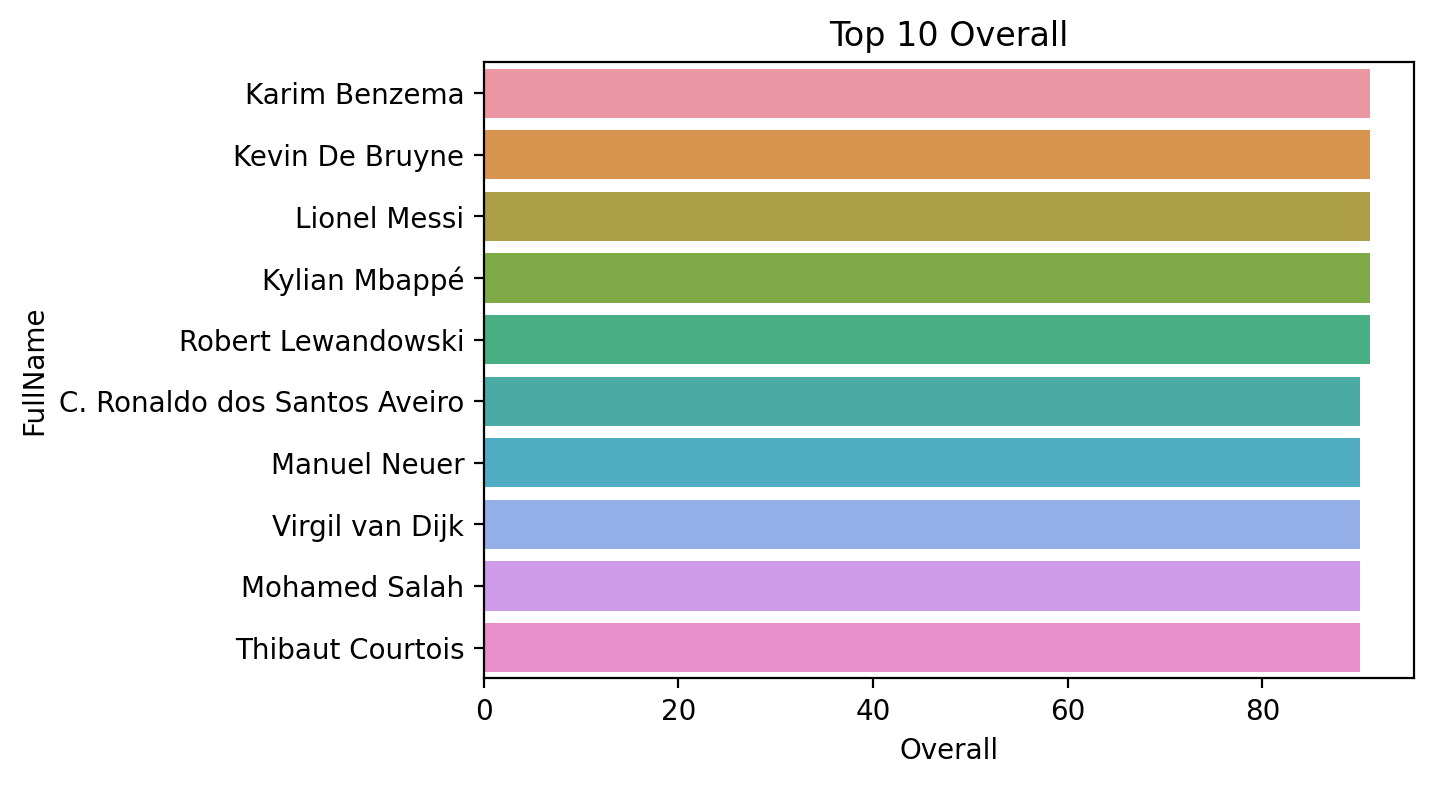

In [20]:
overall_player = fifaa23.groupby('Name').first().sort_values('Overall',ascending=False)[0:10]

plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=overall_player,y='FullName',x='Overall')
plt.title("Top 10 Overall");

In [21]:
df_player_young = fifaa23[fifaa23['Age'] < 20]

overall_player_young = df_player_young.groupby('Name').first().sort_values('Overall',ascending=False)[0:10]


### Here's our top 10 Overall looking at young, good players, it's a good list for career mode players looking to sign young players to bolster their team.

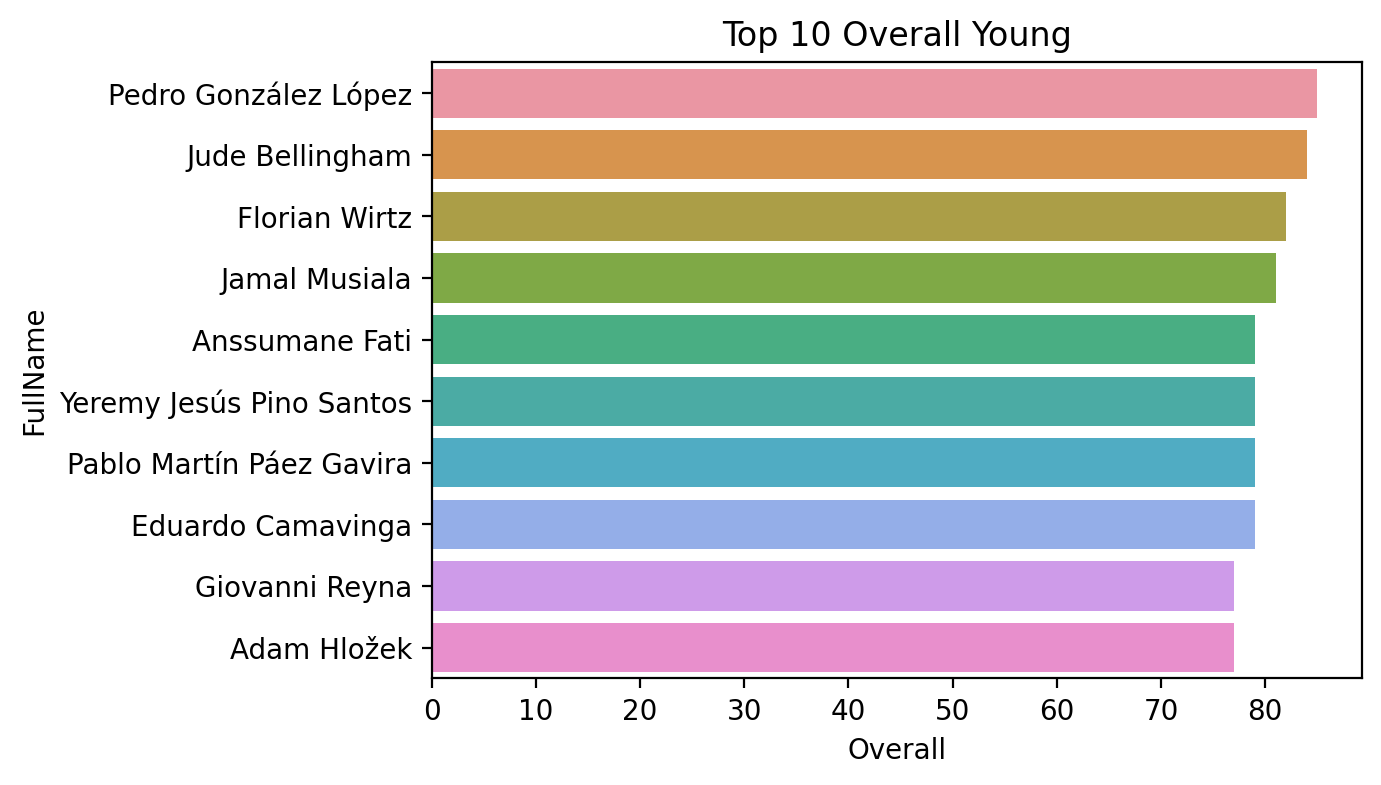

In [22]:
plt.figure(figsize=(6,4),dpi=200)
sns.barplot(data=overall_player_young,y='FullName',x='Overall')
plt.title("Top 10 Overall Young");

### Data Preprocessing

In [23]:
# 1. Handle the missing values:
for i in fifa23.columns:
    if fifa23[i].isnull().sum() > 0:
        print(i, " ", fifa23[i].isnull().sum())

ContractUntil   92


In [24]:
print("The percentage of the null values is: ", (fifa23["ContractUntil"].isnull().sum()/fifa23.shape[0])*100, "%")

The percentage of the null values is:  0.49625114623226707 %


# As the percentage of nulls is small so we can drop the values of nulls in that column.



In [25]:
fifa23.drop(fifa23[fifa23["ContractUntil"].isnull()].index, axis = 0, inplace =True)


In [26]:
fifa23["ContractUntil"].isnull().sum()


0

In [27]:
for i in fifa23.columns:
    if fifa23[i].dtype == 'object':
        print(i)

Name
BestPosition
Club
PreferredFoot
Nationality
AttackingWorkRate
DefensiveWorkRate


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fifa23["PreferredFoot"] = le.fit_transform(fifa23["PreferredFoot"])
fifa23["AttackingWorkRate"] = le.fit_transform(fifa23["AttackingWorkRate"])
fifa23["DefensiveWorkRate"] = le.fit_transform(fifa23["DefensiveWorkRate"])
fifa23["Club"] = le.fit_transform(fifa23["Club"])

### Merge Some Players Positions to reduce the number of classes:

In [29]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}

fifa23 = fifa23.replace({'BestPosition': merge_pos})

In [30]:
mapping = {'CF': 0, 'CM': 1, 'RW': 2, 'GK': 3, 'CB': 4, 'LW': 5, 'LM': 6, 'LB': 7,'RM': 8, 'RB': 9}

fifa23 = fifa23.replace({'BestPosition': mapping})

In [31]:
fifa23 = pd.DataFrame(fifa23)

fifa23.to_csv("players_fifa23_cleaned.csv", index=False)

### Modeling our data for Predicting the Position of the Players

In [32]:
X = fifa23.drop(["BestPosition", "Nationality", "ID"], axis = 1)
Y = pd.DataFrame(fifa23["BestPosition"])

top = fifa23.sort_values(by=["Overall"], ascending=False).head(20)

In [33]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [34]:
X_Train = X_Train.drop(["Name"], axis = 1)
test_names = X_Test["Name"]
X_Test = X_Test.drop(["Name"], axis = 1)

top_pos = top["BestPosition"]
top_names = top["Name"]
top = top.drop(["Name", "BestPosition", "Nationality", "ID"], axis = 1)

### Handle the Imbalanced Data

<Axes: xlabel='BestPosition', ylabel='count'>

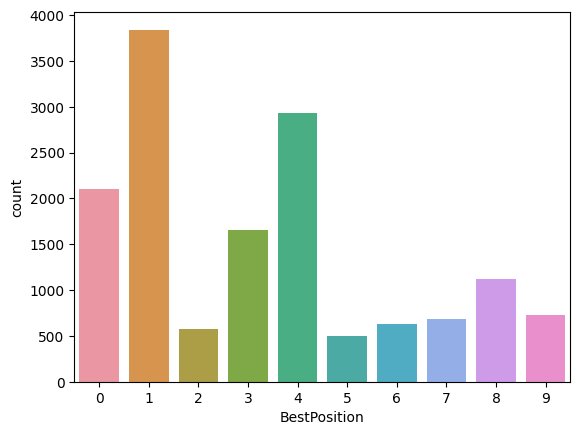

In [35]:
sns.countplot(x="BestPosition", data = Y_Train)

In [36]:
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling  import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)
X_Train, Y_Train = oversample.fit_resample(X_Train, Y_Train)

In [37]:
print(f' X_shape: {X_Train.shape} \n y_shape: {Y_Train.shape}')

 X_shape: (27732, 61) 
 y_shape: (27732, 1)


<Axes: xlabel='BestPosition', ylabel='count'>

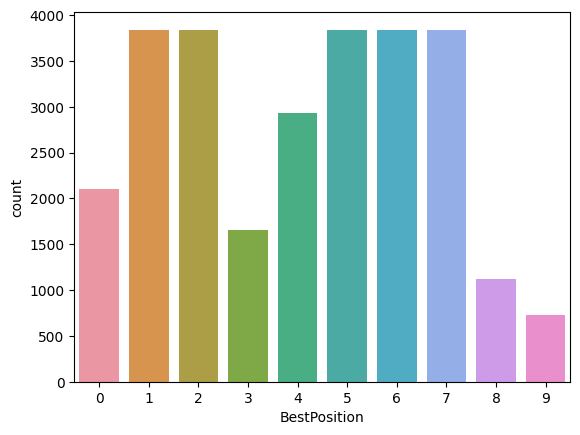

In [38]:
sns.countplot(x="BestPosition", data = Y_Train)

In [39]:
# 4. Feature Scaling:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_Train = mms.fit_transform(X_Train)
X_Test = mms.fit_transform(X_Test)

top = mms.fit_transform(top)

### Modeling

#### Predict the Position of the Player Using 5 Classification Algorithms:

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))
    
models_names = []
models_scores = []
models_auc_scores = []

In [41]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [42]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a treshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [43]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [44]:
def draw_pco(Y_Proba, classes):
    # Plots the Probability Distributions and the ROC Curves One vs Rest
    plt.figure(figsize = (12, 8))
    bins = [i/20 for i in range(20)] + [1]
    roc_auc_ovr = {}
    
    for i in range(len(classes)):
        # Gets the class
        c = classes[i]

        # Prepares an auxiliar dataframe to help with the plots
        #df_aux = X_Test.copy()
        df_aux = pd.DataFrame()
        df_aux['class'] = [1 if list(mapping.keys())[list(mapping.values()).index(y)] == c else 0 for y in Y_Test.values]
        df_aux['prob'] = Y_Proba[:, i]
        df_aux = df_aux.reset_index(drop = True)

        # Plots the probability distribution for the class and the rest
        ax = plt.subplot(2, 3, i+1)
        sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
        ax.set_title(c)
        ax.legend([f"Class: {c}", "Rest"])
        ax.set_xlabel(f"P(x = {c})")

        # Calculates the ROC Coordinates and plots the ROC Curves
        ax_bottom = plt.subplot(2, 3, i+4)
        tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
        plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
        ax_bottom.set_title("ROC Curve OvR")

        # Calculates the ROC AUC OvR
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

    plt.tight_layout()

In [45]:
positions = ['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB','RM', 'RB']
positions

['CF', 'CM', 'RW', 'GK', 'CB', 'LW', 'LM', 'LB', 'RM', 'RB']

### 1. Logistic Regression:

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [47]:
lr.fit(X_Train , Y_Train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
lr.score(X_Train, Y_Train)

0.7047814798788403

In [49]:
lr.score(X_Test, Y_Test)

0.7531165311653116

In [50]:
Y_Pred_lr = lr.predict(X_Test)

In [51]:
models_names.append("Logistic Regression")
models_scores.append(lr.score(X_Test, Y_Test))

In [52]:
classification_report_fun("Logistic Regression", Y_Test, Y_Pred_lr)

The Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       522
           1       0.92      0.75      0.83       962
           2       0.22      0.70      0.34       132
           3       1.00      1.00      1.00       391
           4       0.89      0.95      0.92       711
           5       0.31      0.20      0.24       116
           6       0.36      0.64      0.46       168
           7       0.61      0.82      0.70       178
           8       0.70      0.35      0.47       313
           9       0.73      0.27      0.40       197

    accuracy                           0.75      3690
   macro avg       0.67      0.66      0.63      3690
weighted avg       0.81      0.75      0.76      3690



In [53]:
Y_Proba_lr = lr.predict_proba(X_Test)

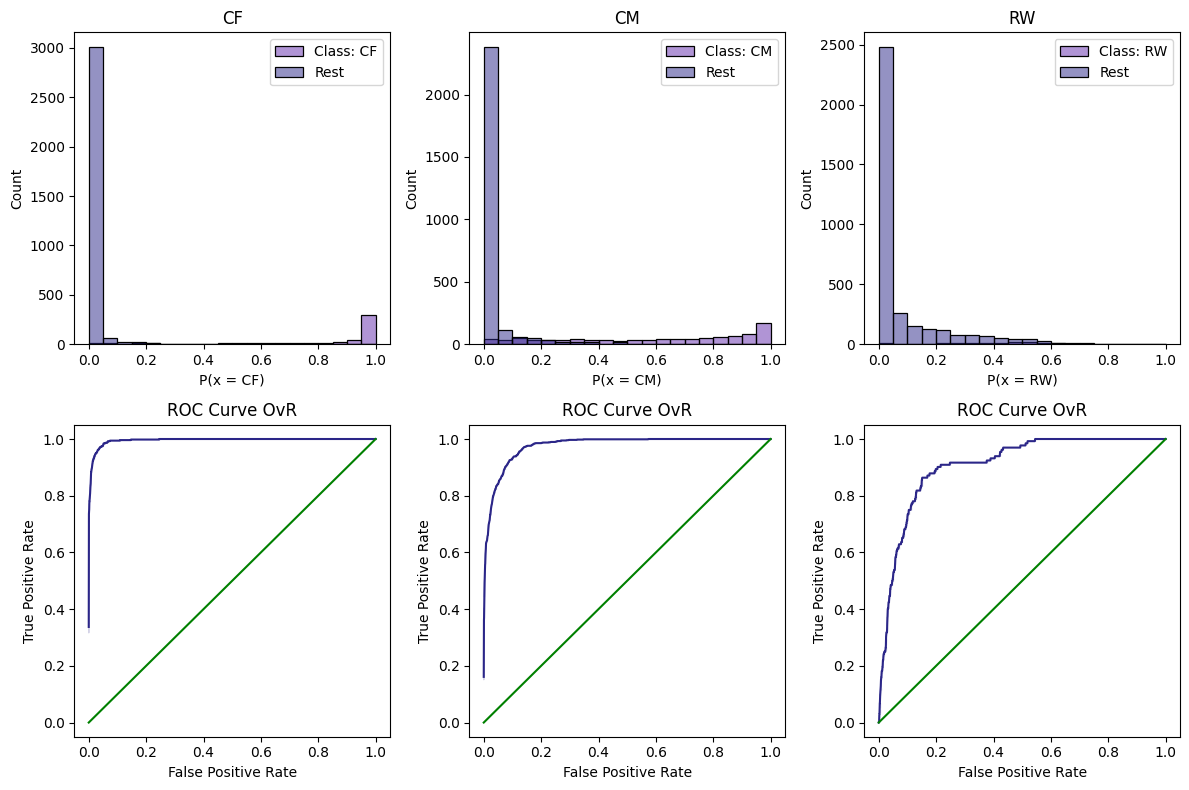

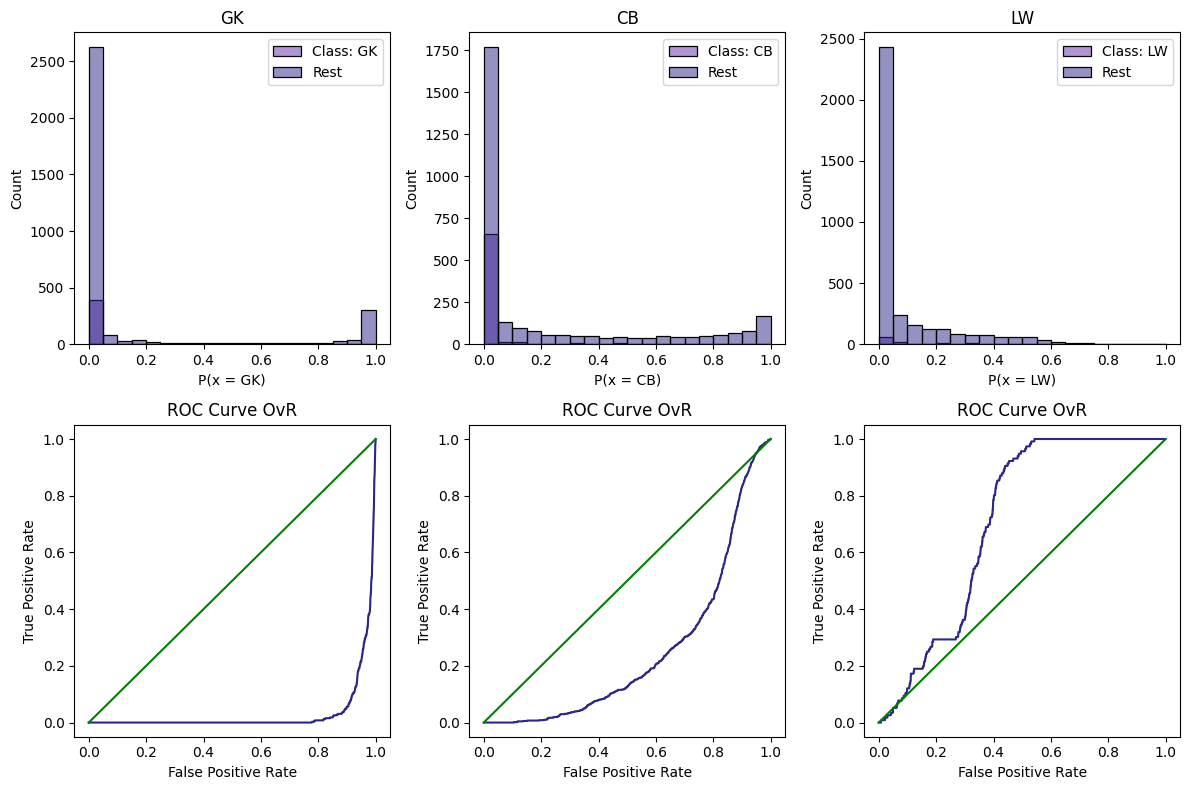

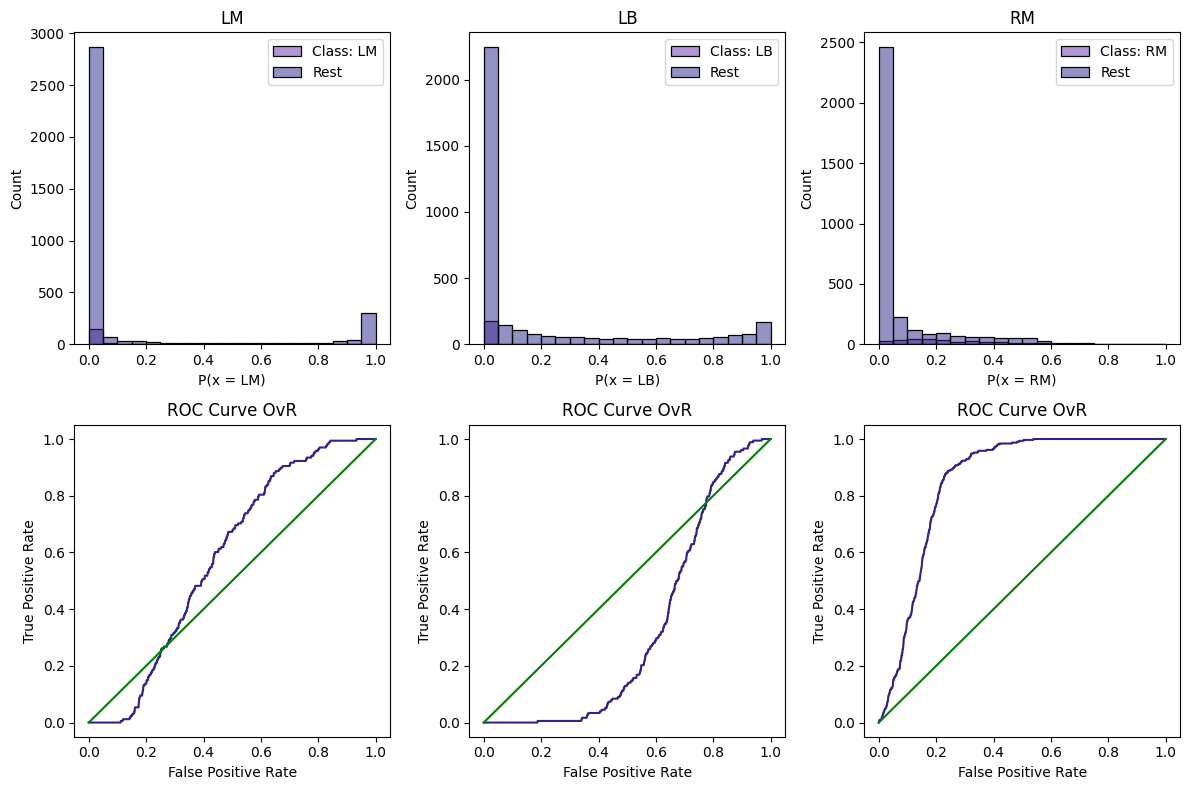

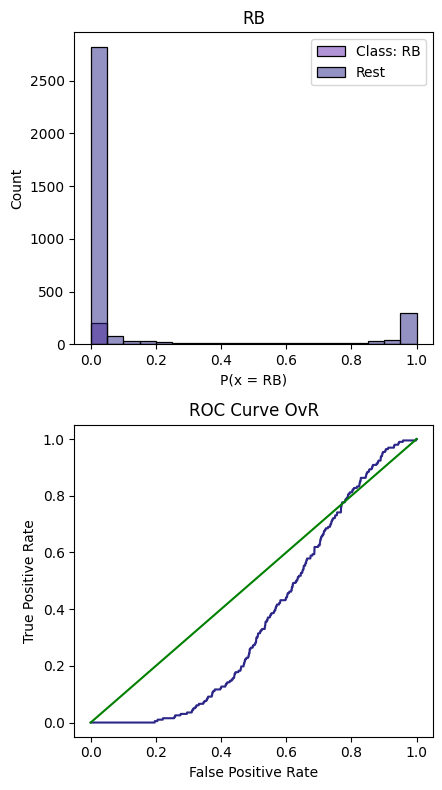

In [54]:
draw_pco(Y_Proba_lr, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_lr, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_lr, ['LM', 'LB','RM'])
draw_pco(Y_Proba_lr, ['RB'])

In [55]:
auc_score_lr = roc_auc_score(Y_Test, Y_Proba_lr, multi_class = 'ovr', average = 'macro')
auc_score_lr

0.9649343598992776

In [56]:
models_auc_scores.append(auc_score_lr)

### 2. Random Forest:

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',n_estimators=50)

In [58]:
rf.fit(X_Train, Y_Train)

/var/folders/25/rf4mbdbs69j35tjr9l6npkl80000gn/T/ipykernel_10833/3407699669.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_Train, Y_Train)


RandomForestClassifier(n_estimators=50)

In [59]:
rf.score(X_Train, Y_Train)

1.0

In [60]:
rf.score(X_Test, Y_Test)

0.7975609756097561

In [61]:
Y_Pred_rf = rf.predict(X_Test)

In [62]:
models_names.append("Random Forest")
models_scores.append(rf.score(X_Test, Y_Test))

In [63]:
classification_report_fun("Random Forest", Y_Test, Y_Pred_rf)

The Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       522
           1       0.81      0.85      0.83       962
           2       0.37      0.30      0.33       132
           3       1.00      1.00      1.00       391
           4       0.89      0.94      0.92       711
           5       0.44      0.24      0.31       116
           6       0.50      0.44      0.47       168
           7       0.68      0.80      0.74       178
           8       0.63      0.56      0.59       313
           9       0.68      0.68      0.68       197

    accuracy                           0.80      3690
   macro avg       0.69      0.67      0.68      3690
weighted avg       0.79      0.80      0.79      3690



In [64]:
# Use the ROC Curve and ROC AUC to Evaluate the model:
Y_Proba_rf = rf.predict_proba(X_Test)

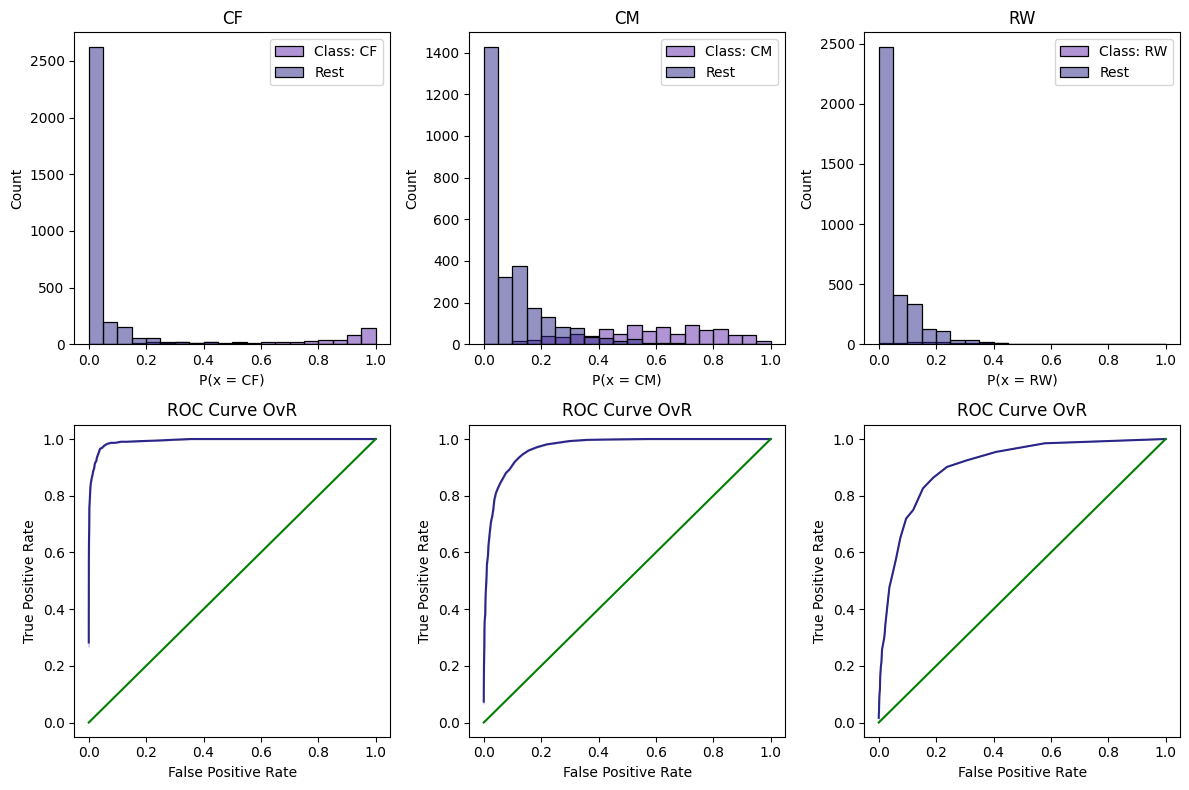

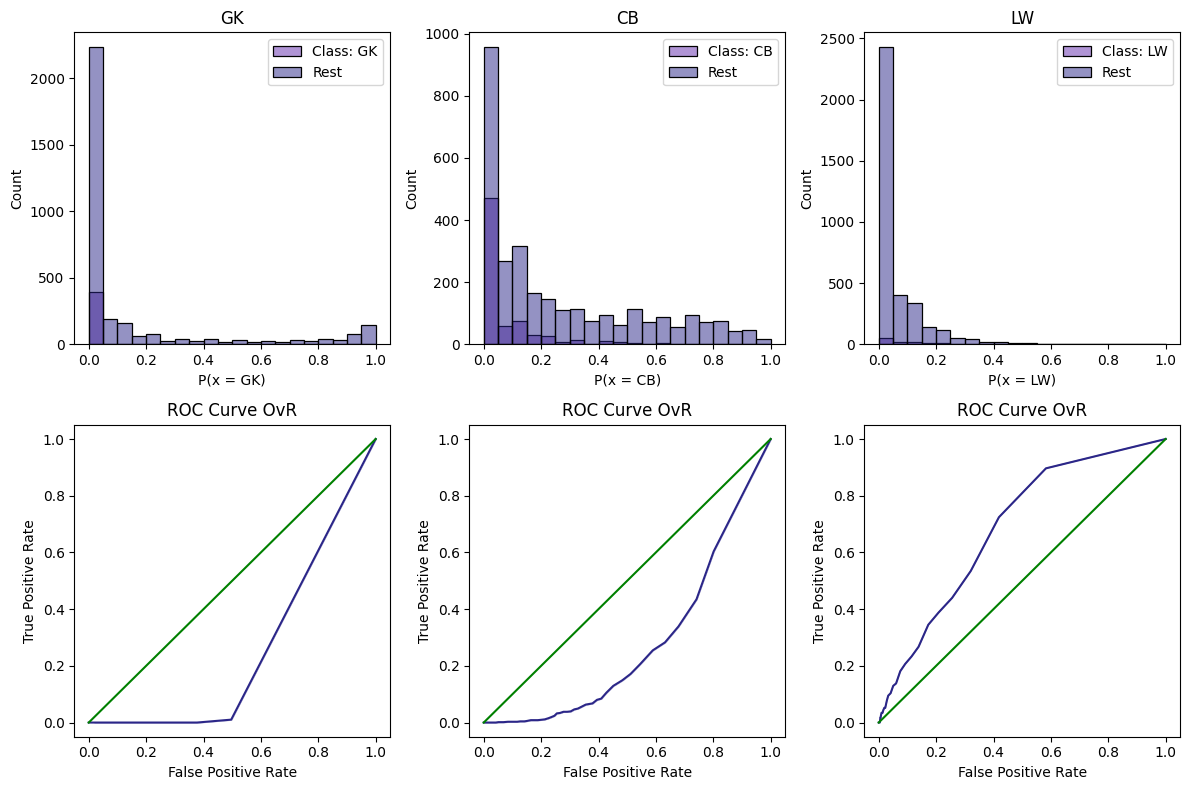

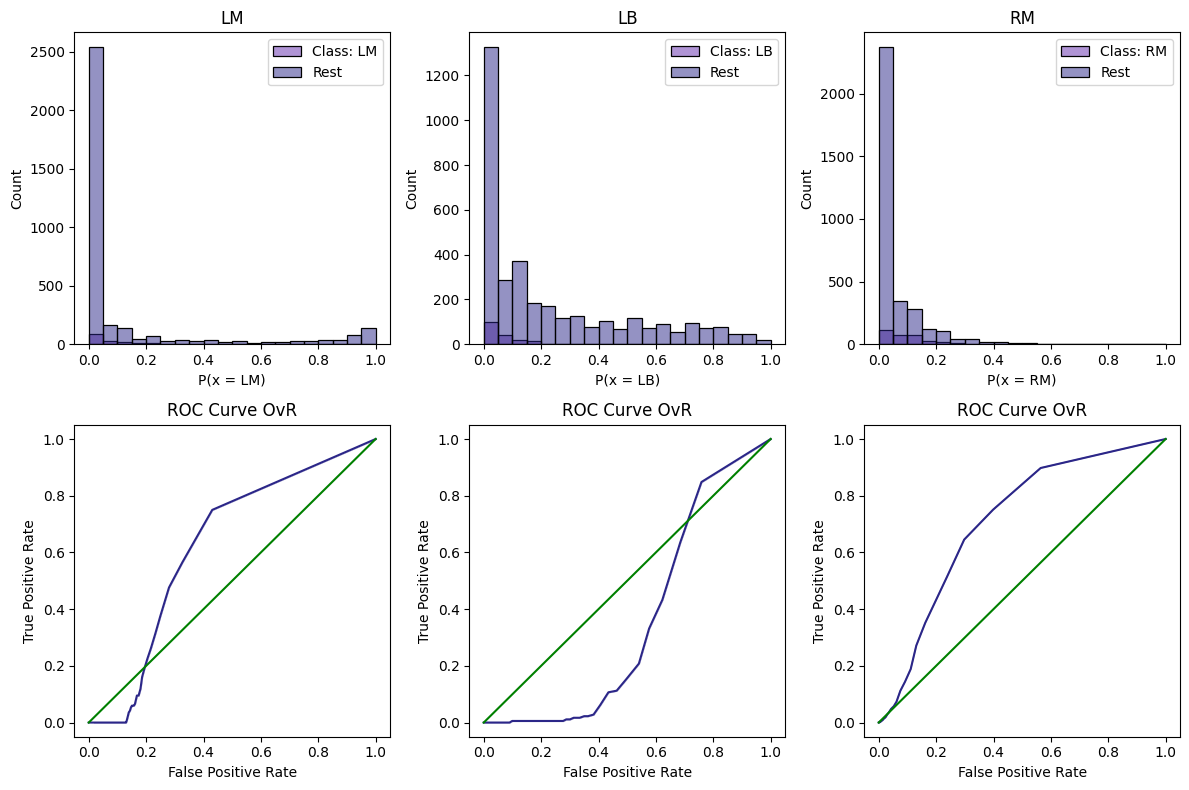

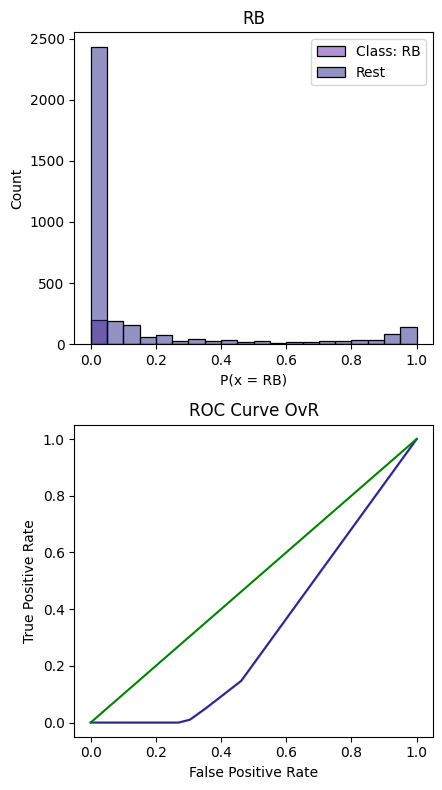

In [65]:
draw_pco(Y_Proba_rf, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_rf, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_rf, ['LM', 'LB','RM'])
draw_pco(Y_Proba_rf, ['RB'])

In [66]:
auc_score_rf = roc_auc_score(Y_Test, Y_Proba_rf, multi_class = 'ovr', average = 'macro')
auc_score_rf

0.9637161957532738

In [67]:
models_auc_scores.append(auc_score_rf)


### 3. XG Boost:

In [68]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [69]:
xgb.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [70]:
xgb.score(X_Test, Y_Test)

0.8303523035230352

In [71]:
Y_Pred_xgb = xgb.predict(X_Test)

In [72]:
models_names.append("XGB")
models_scores.append(xgb.score(X_Test, Y_Test))

In [73]:
classification_report_fun("XGB", Y_Test, Y_Pred_xgb)

The Classification Report for XGB Classifier:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       522
           1       0.91      0.85      0.88       962
           2       0.41      0.39      0.40       132
           3       1.00      1.00      1.00       391
           4       0.91      0.95      0.93       711
           5       0.43      0.34      0.38       116
           6       0.55      0.55      0.55       168
           7       0.73      0.75      0.74       178
           8       0.66      0.73      0.70       313
           9       0.69      0.77      0.72       197

    accuracy                           0.83      3690
   macro avg       0.72      0.73      0.72      3690
weighted avg       0.83      0.83      0.83      3690



In [74]:
# Use the ROC Curve and ROC AUC to Evaluate the model:
Y_Proba_xgb = xgb.predict_proba(X_Test)

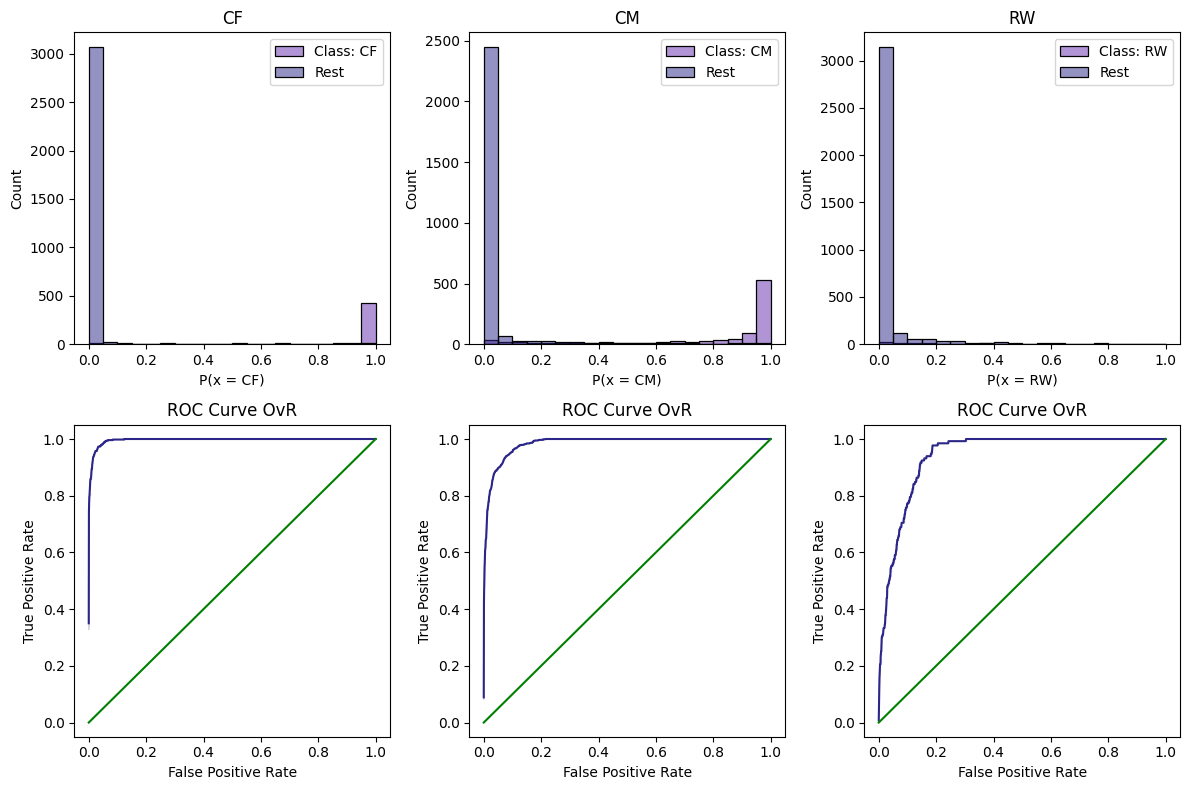

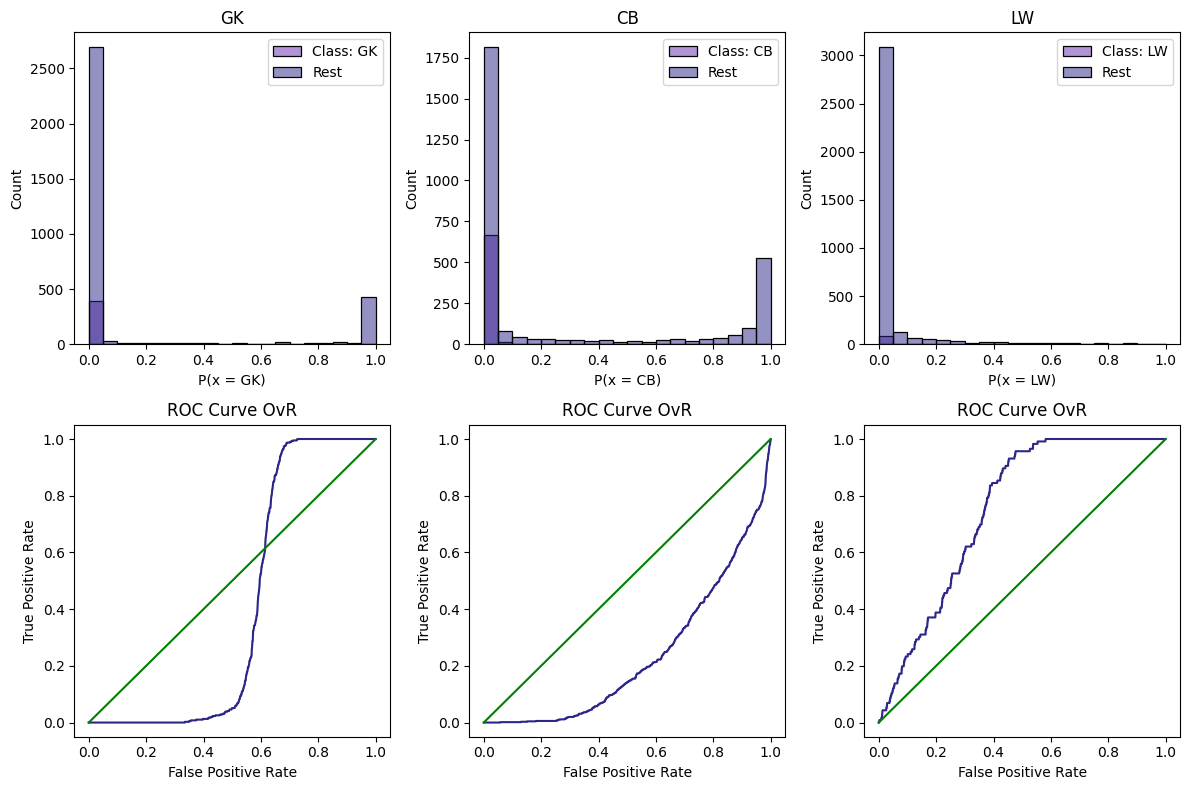

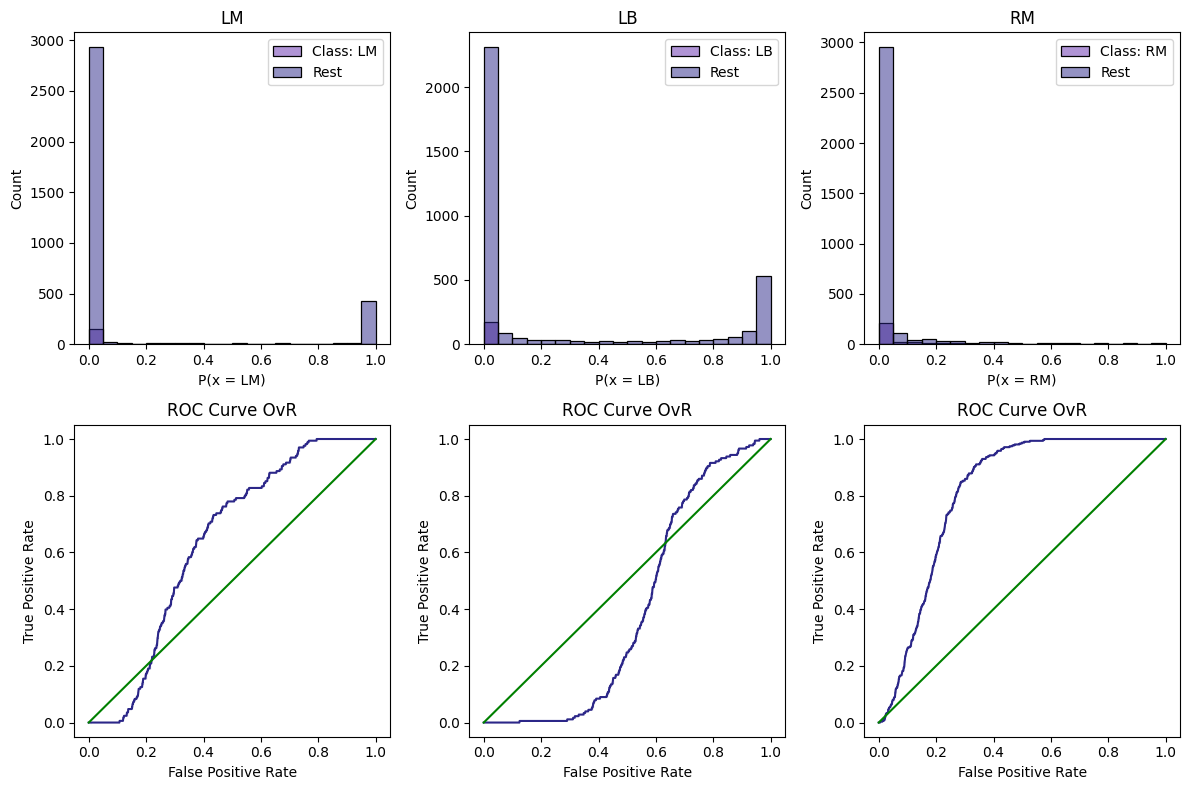

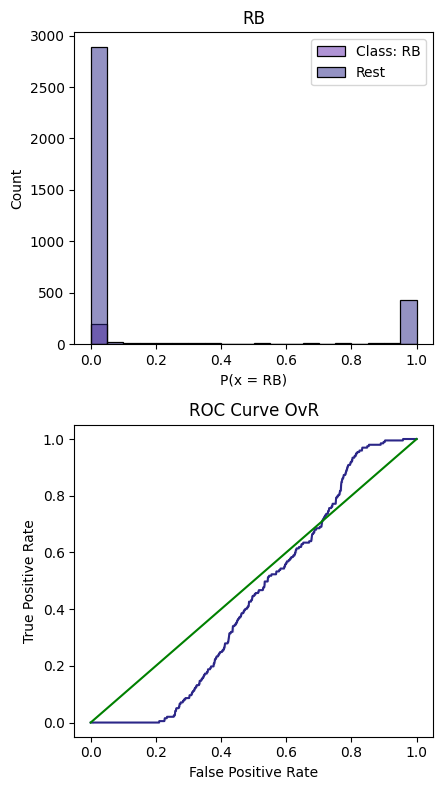

In [75]:
draw_pco(Y_Proba_xgb, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_xgb, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_xgb, ['LM', 'LB','RM'])
draw_pco(Y_Proba_xgb, ['RB'])

In [76]:
auc_score_xgb = roc_auc_score(Y_Test, Y_Proba_xgb, multi_class = 'ovr', average = 'macro')
auc_score_xgb

0.9751887204635498

In [77]:
models_auc_scores.append(auc_score_xgb)

## 4. Decision Tree

In [78]:
from sklearn.tree  import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_features = 39,max_depth = 10)

In [79]:
dt.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10, max_features=39)

In [80]:
dt.score(X_Train, Y_Train)

0.7502884754074716

In [81]:
dt.score(X_Test, Y_Test)

0.6363143631436314

In [82]:
Y_Pred_dt = dt.predict(X_Test)

In [83]:
models_names.append("Decision Tree")
models_scores.append(dt.score(X_Test, Y_Test))

In [84]:
classification_report_fun("Decision Tree", Y_Test, Y_Pred_dt)

The Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       522
           1       0.82      0.59      0.68       962
           2       0.16      0.63      0.26       132
           3       1.00      1.00      1.00       391
           4       0.90      0.82      0.86       711
           5       0.12      0.34      0.18       116
           6       0.34      0.60      0.43       168
           7       0.54      0.62      0.58       178
           8       0.51      0.31      0.39       313
           9       0.38      0.12      0.18       197

    accuracy                           0.64      3690
   macro avg       0.57      0.57      0.53      3690
weighted avg       0.74      0.64      0.67      3690



In [85]:
# Use the ROC Curve and ROC AUC to Evaluate the model:
Y_Proba_dt = dt.predict_proba(X_Test)



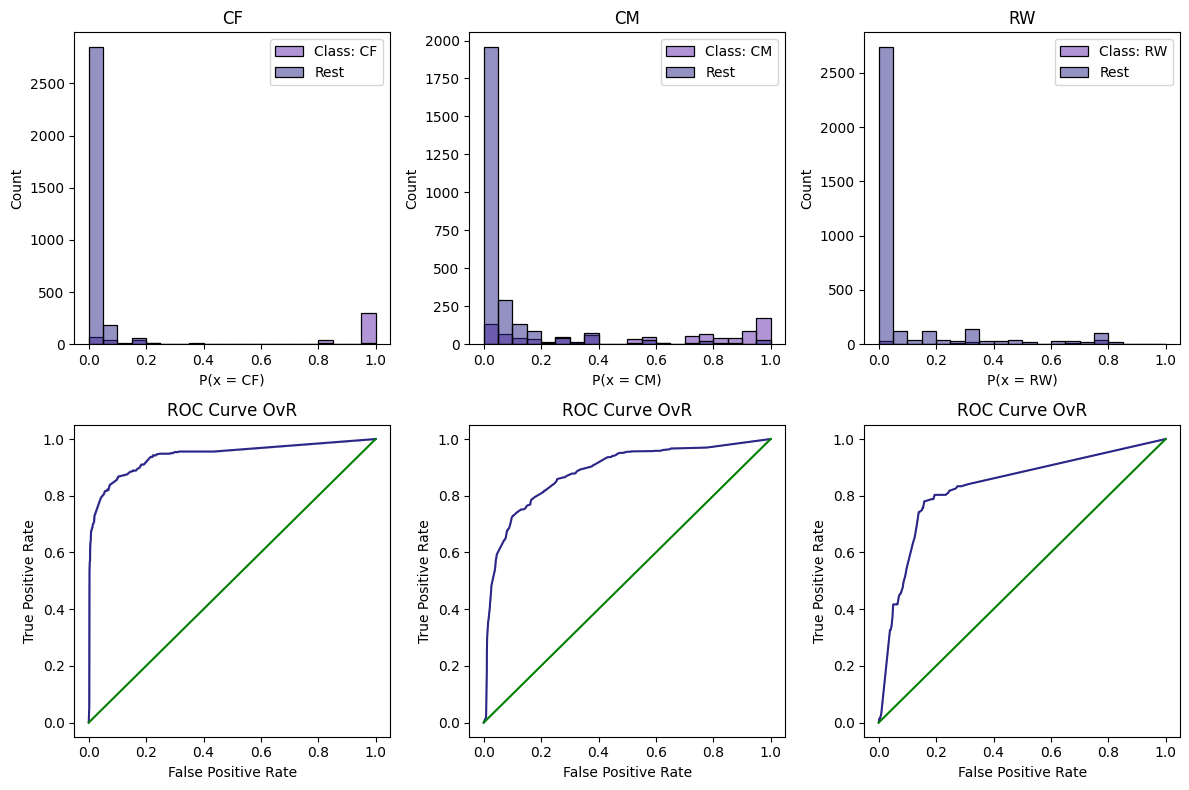

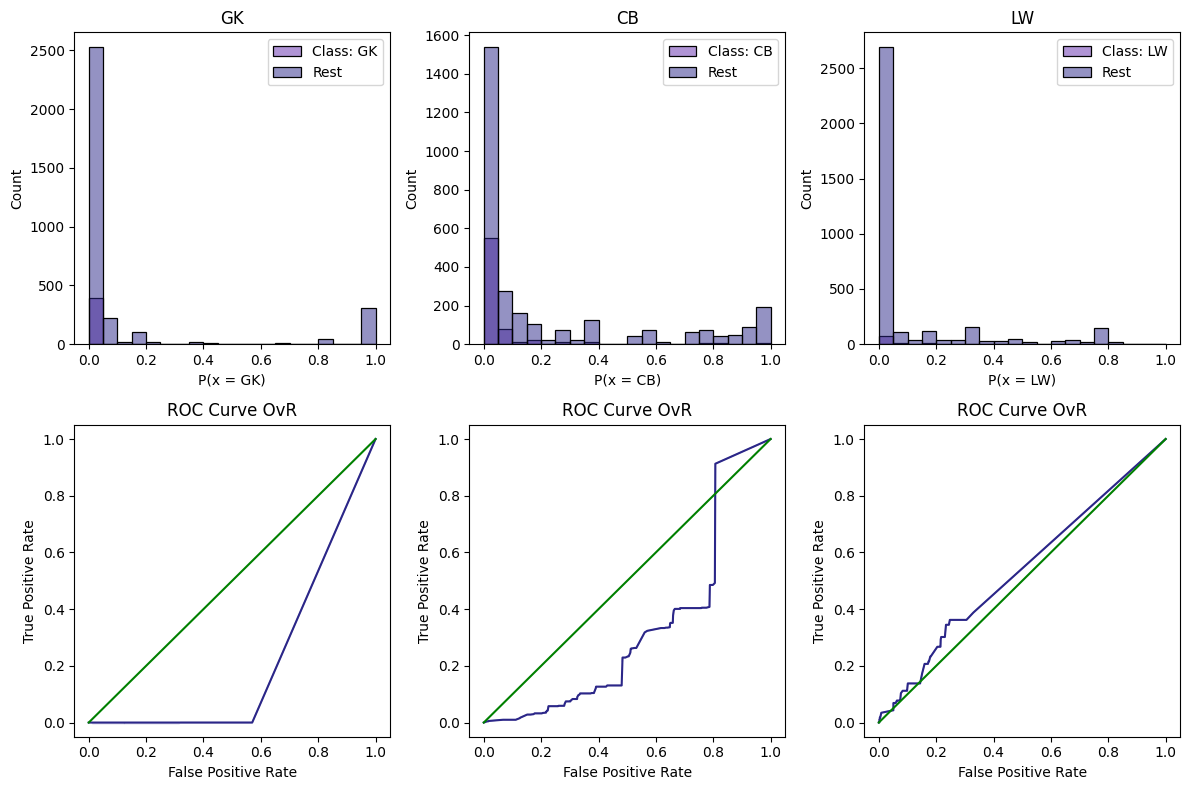

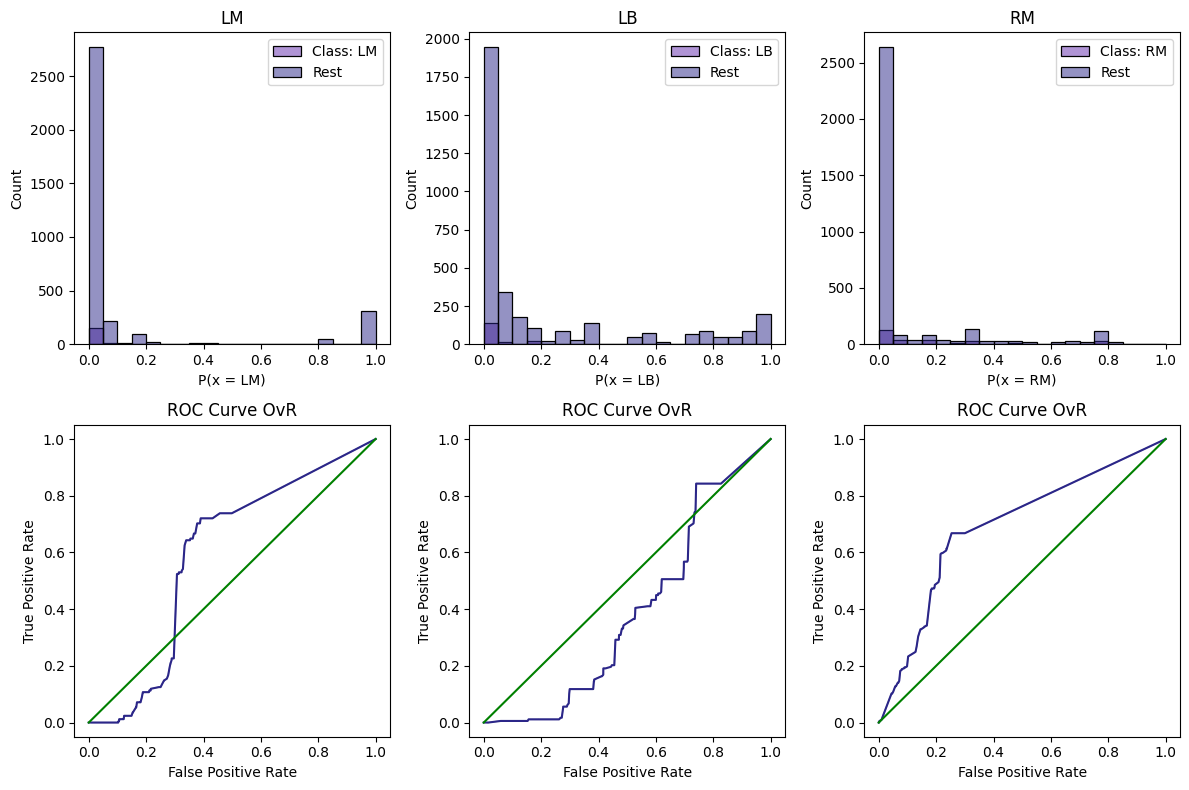

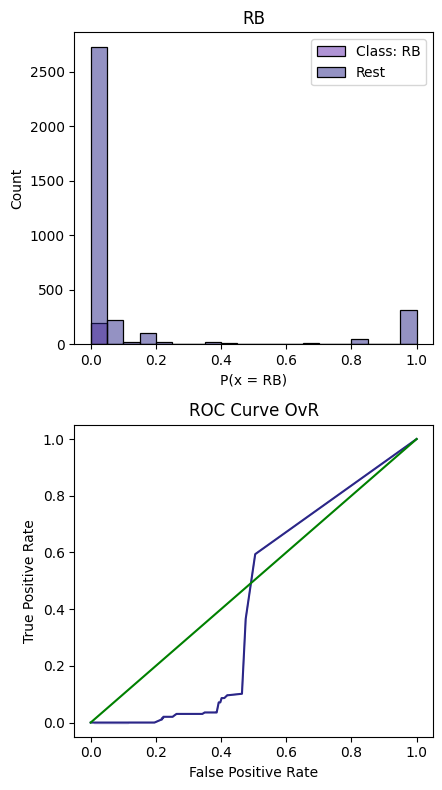

In [86]:
draw_pco(Y_Proba_dt, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_dt, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_dt, ['LM', 'LB','RM'])
draw_pco(Y_Proba_dt, ['RB'])

In [87]:
auc_score_dt = roc_auc_score(Y_Test, Y_Proba_dt, multi_class = 'ovr', average = 'macro')
auc_score_dt

0.9057568939320726

In [88]:
models_auc_scores.append(auc_score_dt)

## 5.Adaboost:

In [89]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

In [90]:
ada.fit(X_Train, Y_Train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [91]:
ada.score(X_Train, Y_Train)

0.5329583153036204

In [92]:
ada.score(X_Test, Y_Test)

0.618970189701897

In [93]:
Y_Pred_ada = dt.predict(X_Test)

In [94]:
models_names.append("Adaboost")
models_scores.append(ada.score(X_Test, Y_Test))

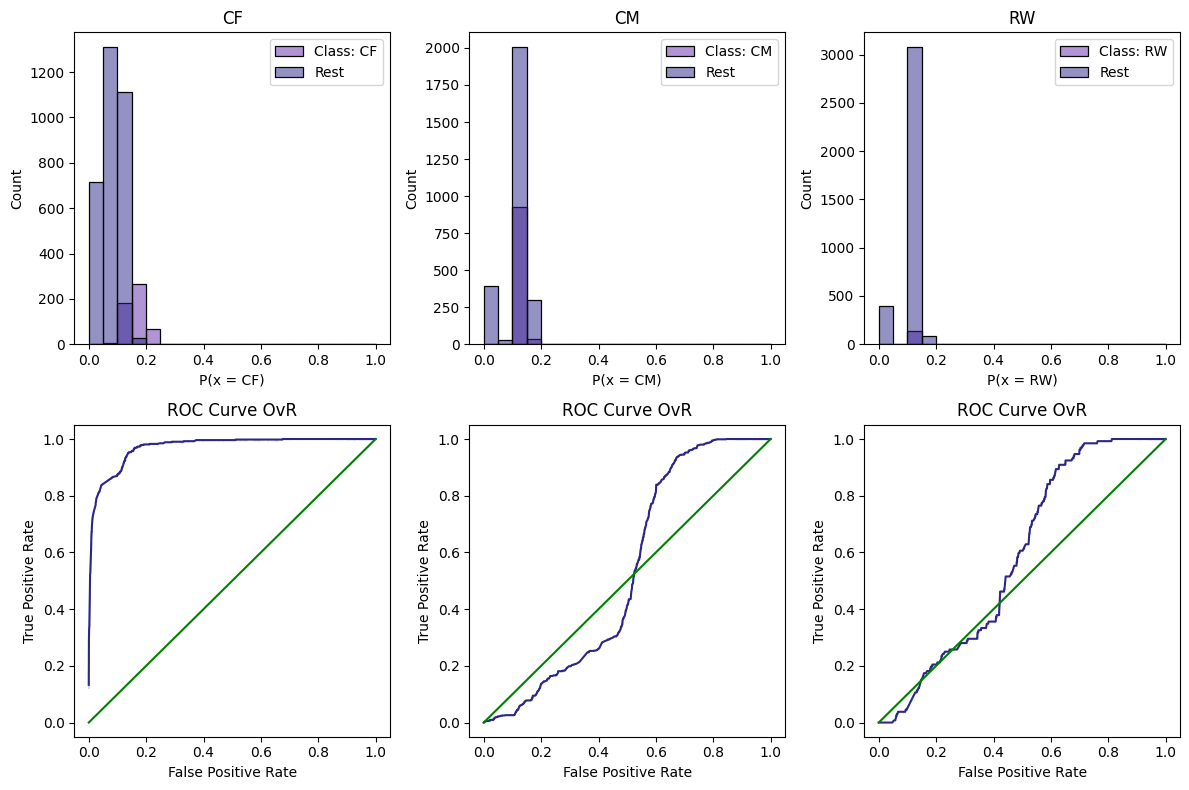

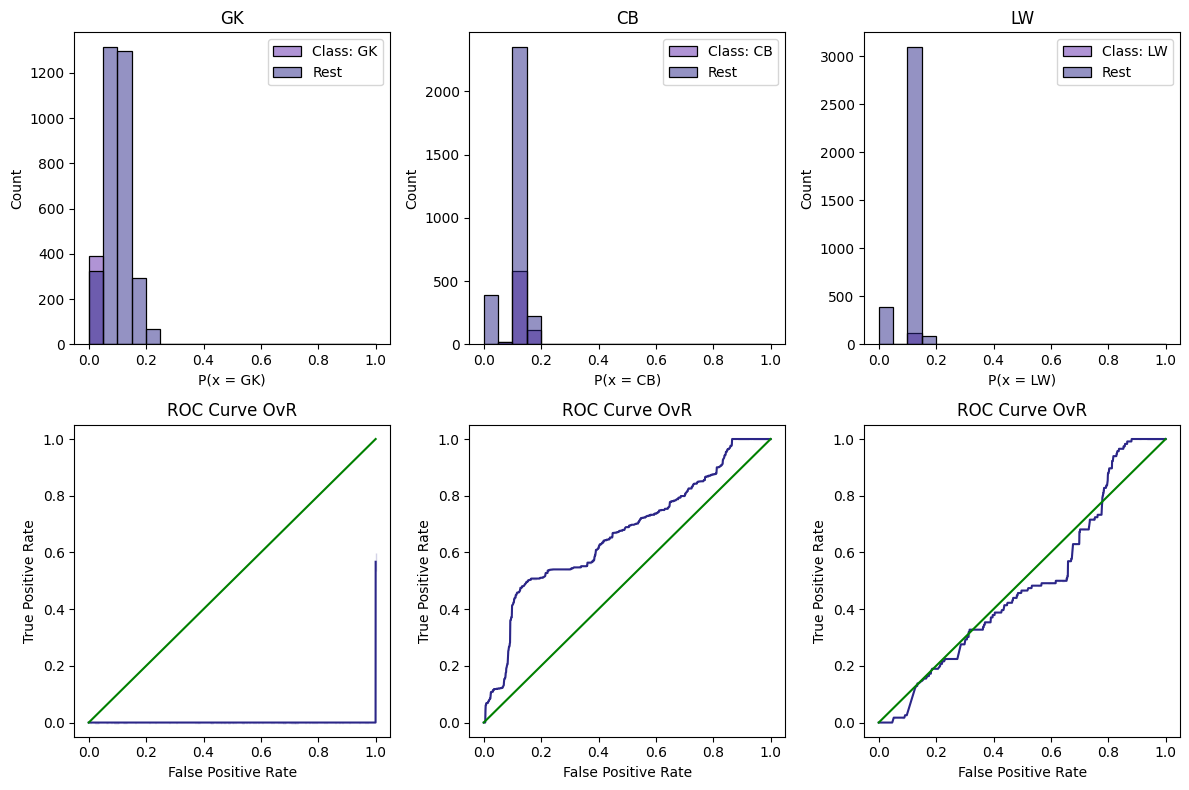

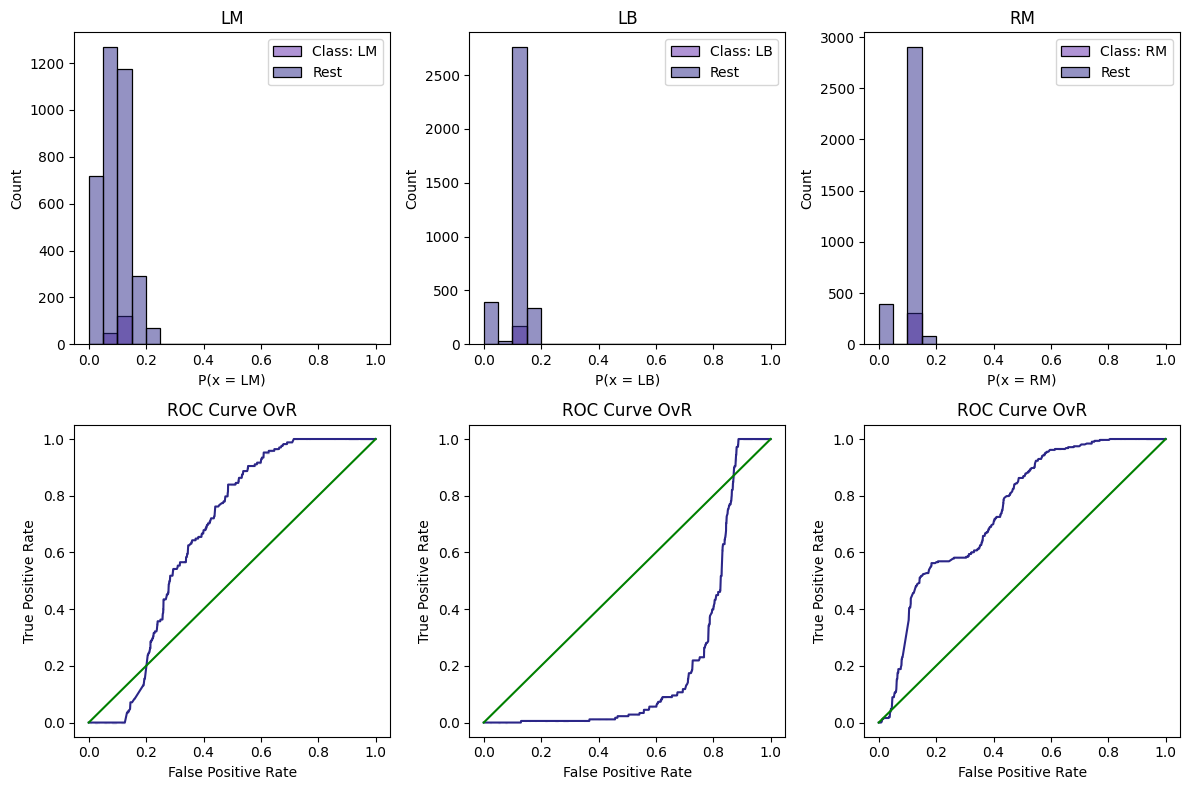

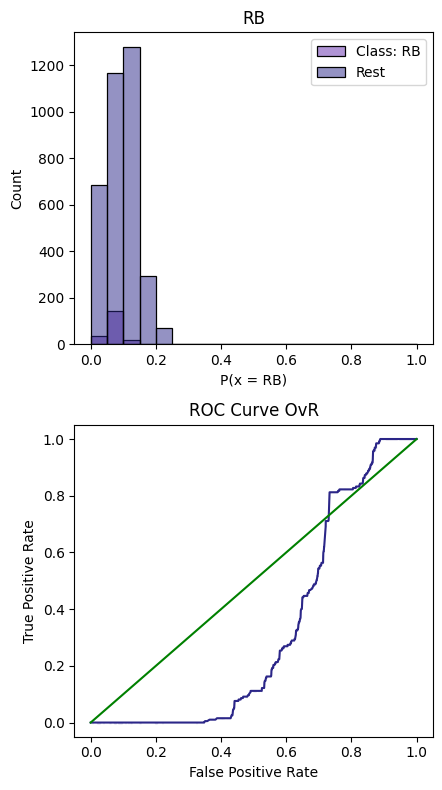

In [95]:
# Use the ROC Curve and ROC AUC to Evaluate the model:
Y_Proba_ada = ada.predict_proba(X_Test)
draw_pco(Y_Proba_ada, ['CF', 'CM', 'RW'])
draw_pco(Y_Proba_ada, ['GK', 'CB', 'LW'])
draw_pco(Y_Proba_ada, ['LM', 'LB','RM'])
draw_pco(Y_Proba_ada, ['RB'])

In [96]:
auc_score_ada = roc_auc_score(Y_Test, Y_Proba_ada, multi_class = 'ovr', average = 'macro')

In [97]:
models_auc_scores.append(auc_score_ada)

## Compare the Test Accuracy of The Classification Algorithms

### Based on The Accuracy

In [98]:
comp = pd.DataFrame()
comp['name'] = models_names
comp['score'] = models_scores
comp

,name,score
0,Logistic Regression,0.753117
1,Random Forest,0.797561
2,XGB,0.830352
3,Decision Tree,0.636314
4,Adaboost,0.618970


In [99]:
cm = sns.light_palette("green", as_cmap=True)
s = comp.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.753117
1,Random Forest,0.797561
2,XGB,0.830352
3,Decision Tree,0.636314
4,Adaboost,0.618970


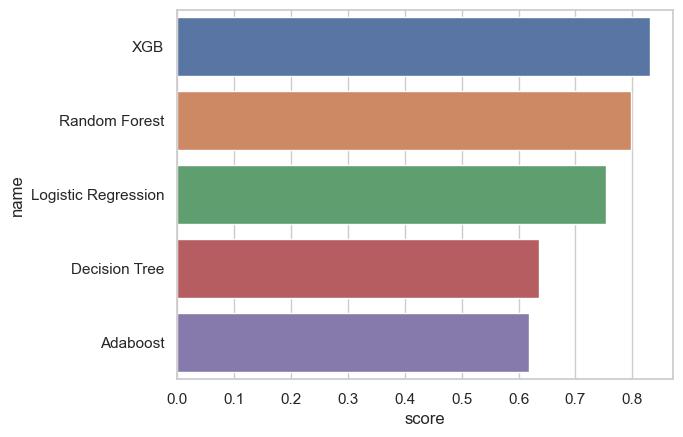

In [100]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp.sort_values(by="score", ascending=False))

### Based on the ROC AUC Score:

In [101]:
comp_auc = pd.DataFrame()
comp_auc['name'] = models_names
comp_auc['score'] = models_auc_scores
comp_auc

,name,score
0,Logistic Regression,0.964934
1,Random Forest,0.963716
2,XGB,0.975189
3,Decision Tree,0.905757
4,Adaboost,0.818110


In [102]:
cm = sns.light_palette("green", as_cmap=True)
s = comp_auc.style.background_gradient(cmap=cm)
s

,name,score
0,Logistic Regression,0.964934
1,Random Forest,0.963716
2,XGB,0.975189
3,Decision Tree,0.905757
4,Adaboost,0.818110


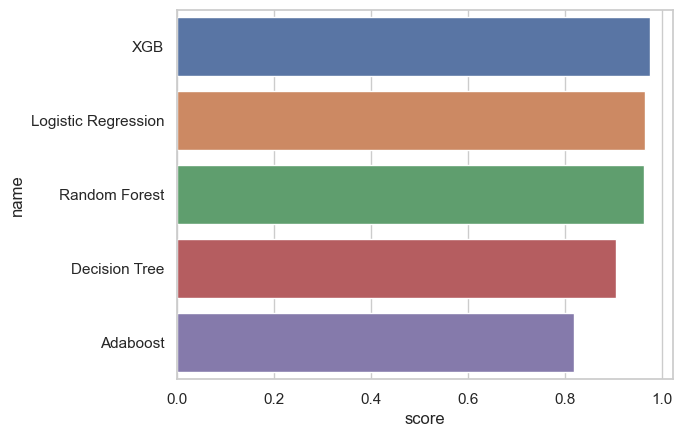

In [103]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=comp_auc.sort_values(by="score", ascending=False))

### So We can deduce that the Best Algorithm for this Data is the XGB

## Test the Algorithm on the top 20 Players:

In [104]:
top = pd.DataFrame(top)

for i in range(top.shape[0]):
    pred_pos = xgb.predict(top.iloc[[i]])[0]
    
    pred = list(mapping.keys())[list(mapping.values()).index(pred_pos)]
    true_pos = list(mapping.keys())[list(mapping.values()).index(top_pos.iloc[i])]

    print('Name: {}\nPrediction: {}\n True Best Pos: {}\n'.format(top_names.iloc[i], pred, true_pos))

Name: L. Messi
Prediction: CM
 True Best Pos: CM

Name: R. Lewandowski
Prediction: CF
 True Best Pos: CF

Name: K. De Bruyne
Prediction: CM
 True Best Pos: CM

Name: K. Mbappé
Prediction: CF
 True Best Pos: CF

Name: K. Benzema
Prediction: CF
 True Best Pos: CF

Name: M. Salah
Prediction: RW
 True Best Pos: RW

Name: T. Courtois
Prediction: GK
 True Best Pos: GK

Name: M. Neuer
Prediction: GK
 True Best Pos: GK

Name: Cristiano Ronaldo
Prediction: CF
 True Best Pos: CF

Name: V. van Dijk
Prediction: CB
 True Best Pos: CB

Name: S. Mané
Prediction: CF
 True Best Pos: LM

Name: N. Kanté
Prediction: CM
 True Best Pos: CM

Name: J. Kimmich
Prediction: CM
 True Best Pos: CM

Name: Ederson
Prediction: GK
 True Best Pos: GK

Name: Alisson
Prediction: GK
 True Best Pos: GK

Name: J. Oblak
Prediction: GK
 True Best Pos: GK

Name: Casemiro
Prediction: CB
 True Best Pos: CM

Name: H. Son
Prediction: CF
 True Best Pos: LW

Name: H. Kane
Prediction: CF
 True Best Pos: CF

Name: Neymar Jr
Prediction